In [66]:
!nvidia-smi

Wed Aug 18 00:23:04 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 470.57.02    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   76C    P0    35W /  70W |   1068MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [67]:
# pip install torch==1.8.0+cu111 torchvision==0.9.0+cu111 torchaudio==0.8.0 -f https://download.pytorch.org/whl/torch_stable.html


In [68]:
pip list | grep torch

torch                         1.9.0+cu102
torchsummary                  1.5.1
torchtext                     0.10.0
torchvision                   0.10.0+cu102


In [69]:
import torch

In [70]:
import numpy as np

In [71]:
nums = torch.arange(9)
nums

tensor([0, 1, 2, 3, 4, 5, 6, 7, 8])

In [72]:
nums.reshape(3,3)

tensor([[0, 1, 2],
        [3, 4, 5],
        [6, 7, 8]])

In [73]:
nums.view(3,3)

tensor([[0, 1, 2],
        [3, 4, 5],
        [6, 7, 8]])

In [74]:
randoms = torch.rand((3,3))
randoms

tensor([[0.8685, 0.7666, 0.9606],
        [0.0653, 0.9811, 0.9578],
        [0.8235, 0.0155, 0.2822]])

In [75]:
zeros = torch.zeros((3,3))
zeros

tensor([[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]])

In [76]:
ones = torch.ones((3,3))
ones

tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]])

In [77]:
torch.zeros_like(ones)

tensor([[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]])

In [78]:
ones.shape

torch.Size([3, 3])

In [79]:
ones.size()

torch.Size([3, 3])

In [80]:
nums * 3

tensor([ 0,  3,  6,  9, 12, 15, 18, 21, 24])

In [81]:
nums = nums.reshape((3,3))

In [82]:
nums + nums

tensor([[ 0,  2,  4],
        [ 6,  8, 10],
        [12, 14, 16]])

In [83]:
result = torch.add(nums, 10)
result

tensor([[10, 11, 12],
        [13, 14, 15],
        [16, 17, 18]])

In [84]:
result.numpy()

array([[10, 11, 12],
       [13, 14, 15],
       [16, 17, 18]])

In [85]:
range_nums = torch.arange(9).reshape(3,3)
range_nums

tensor([[0, 1, 2],
        [3, 4, 5],
        [6, 7, 8]])

In [86]:
range_nums.view(-1)

tensor([0, 1, 2, 3, 4, 5, 6, 7, 8])

In [87]:
range_nums.view(1,9)

tensor([[0, 1, 2, 3, 4, 5, 6, 7, 8]])

In [88]:
range_nums.view(-1,9)

tensor([[0, 1, 2, 3, 4, 5, 6, 7, 8]])

In [89]:
nums

tensor([[0, 1, 2],
        [3, 4, 5],
        [6, 7, 8]])

In [90]:
nums[1]

tensor([3, 4, 5])

In [91]:
nums[1:,1:]

tensor([[4, 5],
        [7, 8]])

In [92]:
arr = np.array([1, 1, 1])
arr

array([1, 1, 1])

In [93]:
arr_torch = torch.from_numpy(arr)
arr_torch

tensor([1, 1, 1])

In [94]:
arr_torch.float()

tensor([1., 1., 1.])

In [95]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'

In [96]:
device

'cuda'

In [97]:
arr_torch.to(device) #gpu 연산을 위해 보내는 과정

tensor([1, 1, 1], device='cuda:0')

In [98]:
arr_torch.to('cpu')

tensor([1, 1, 1])

In [99]:
x = torch.ones(2,2, requires_grad=True)
x

tensor([[1., 1.],
        [1., 1.]], requires_grad=True)

In [100]:
y = x + 2
y

tensor([[3., 3.],
        [3., 3.]], grad_fn=<AddBackward0>)

In [101]:
z = y*y*3
out = z.mean()

In [102]:
print(z, out)

tensor([[27., 27.],
        [27., 27.]], grad_fn=<MulBackward0>) tensor(27., grad_fn=<MeanBackward0>)


In [103]:
out.backward()

In [104]:
print(x.grad)

tensor([[4.5000, 4.5000],
        [4.5000, 4.5000]])


In [105]:
print(x.requires_grad)
print((x ** 2).requires_grad)

True
True


In [106]:
with torch.no_grad():
    print((x ** 2).requires_grad)

False


In [107]:
from torchvision import datasets, transforms

In [108]:
batch_size = 32
test_batch_size = 32

In [109]:
train_loader = torch.utils.data.DataLoader(
    datasets.MNIST('dataset/', train=True, download=True,
                   transform = transforms.Compose([
                       transforms.ToTensor(),
                       transforms.Normalize(mean=(0.5,),std=(0.5,))
                   ])),
                   batch_size = batch_size,
                   shuffle=True

)

In [110]:
test_loader = torch.utils.data.DataLoader(
    datasets.MNIST('dataset/', train=False, download = True, 
                   transform = transforms.Compose([
                        transforms.ToTensor(),
                        transforms.Normalize(mean=(0.5,), std = (0.5,))
                   ])),
                   batch_size = batch_size,
                   shuffle = True
)

In [111]:
images, labels = next(iter(train_loader))

In [112]:
images.shape

torch.Size([32, 1, 28, 28])

In [113]:
labels.shape

torch.Size([32])

In [114]:
import numpy as np
import matplotlib.pyplot as plt

In [115]:
images[0].shape

torch.Size([1, 28, 28])

In [116]:
torch_image = torch.squeeze(images[0])
torch_image.shape

torch.Size([28, 28])

In [117]:
image = torch_image.numpy()
image.shape

(28, 28)

In [118]:
label = labels[0].numpy()

In [119]:
label

array(6)

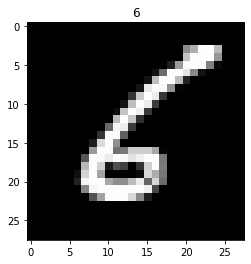

In [120]:
plt.title(label)
plt.imshow(image, 'gray')
plt.show()

In [121]:
import torch.nn as nn
import torch.nn.functional as F #weight와 관계없는 함수들

In [122]:
# nn.Conv2d(in_channels=1, out_channels=20, kernel_size=5, stride=1) "conv exam"

In [123]:
layer=nn.Conv2d(1, 20, 5, 1).to(device)
layer

Conv2d(1, 20, kernel_size=(5, 5), stride=(1, 1))

In [124]:
weight = layer.weight
weight.shape

torch.Size([20, 1, 5, 5])

In [125]:
# weight.numpy()

In [126]:
# weight.cpu().numpy()

In [150]:
# weight.cpu().detach().numpy()

In [128]:
weight = weight.cpu().detach().numpy()
weight.shape

(20, 1, 5, 5)

In [131]:
import matplotlib
import numpy as np
import matplotlib.pyplot as plt

def cmap_map(function, cmap):
    """ Applies function (which should operate on vectors of shape 3: [r, g, b]), on colormap cmap.
    This routine will break any discontinuous points in a colormap.
    """
    cdict = cmap._segmentdata
    step_dict = {}
    # Firt get the list of points where the segments start or end
    for key in ('red', 'green', 'blue'):
        step_dict[key] = list(map(lambda x: x[0], cdict[key]))
    step_list = sum(step_dict.values(), [])
    step_list = np.array(list(set(step_list)))
    # Then compute the LUT, and apply the function to the LUT
    reduced_cmap = lambda step : np.array(cmap(step)[0:3])
    old_LUT = np.array(list(map(reduced_cmap, step_list)))
    new_LUT = np.array(list(map(function, old_LUT)))
    # Now try to make a minimal segment definition of the new LUT
    cdict = {}
    for i, key in enumerate(['red','green','blue']):
        this_cdict = {}
        for j, step in enumerate(step_list):
            if step in step_dict[key]:
                this_cdict[step] = new_LUT[j, i]
            elif new_LUT[j,i] != old_LUT[j, i]:
                this_cdict[step] = new_LUT[j, i]
        colorvector = list(map(lambda x: x + (x[1], ), this_cdict.items()))
        colorvector.sort()
        cdict[key] = colorvector

    return matplotlib.colors.LinearSegmentedColormap('colormap',cdict,1024)

In [132]:
light_jet = cmap_map(lambda x: x/2 + 0.5, matplotlib.cm.jet)

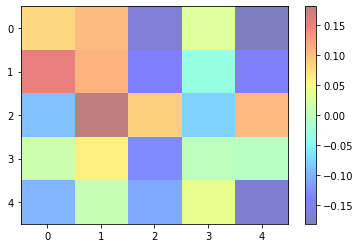

In [136]:
plt.imshow(weight[0, 0, :, :], cmap=light_jet, aspect='auto')
plt.colorbar()
plt.show()

In [137]:
output_data = layer(images.to(device))

In [140]:
output_data.shape

torch.Size([32, 20, 24, 24])

In [141]:
output_data = output_data.data

In [142]:
output_data.shape

torch.Size([32, 20, 24, 24])

In [143]:
output = output_data.cpu().numpy()
output.shape

(32, 20, 24, 24)

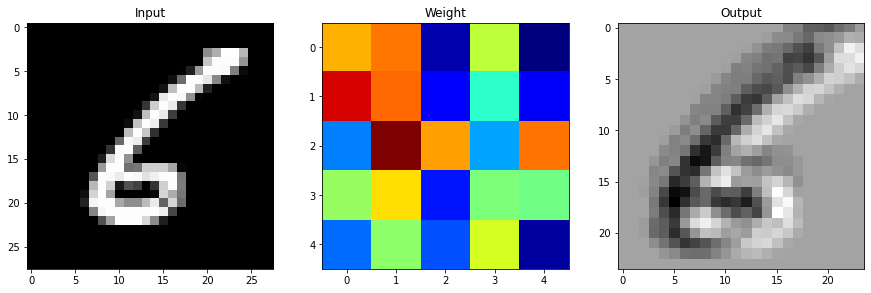

In [145]:
plt.figure(figsize=(15, 30))
plt.subplot(131)
plt.title('Input')
plt.imshow(image, 'gray')
plt.subplot(132)
plt.title('Weight')
plt.imshow(weight[0, 0, :, :], 'jet')
plt.subplot(133)
plt.title('Output')
plt.imshow(output[0, 0, :, :], 'gray')
plt.show()

In [149]:
output_data.shape

torch.Size([32, 20, 24, 24])

In [151]:
pool = F.max_pool2d(output_data,2,2)
pool.shape

/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /pytorch/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)


torch.Size([32, 20, 12, 12])

In [157]:
pool_arr = pool.cpu().numpy()
pool_arr.shape

(32, 20, 12, 12)

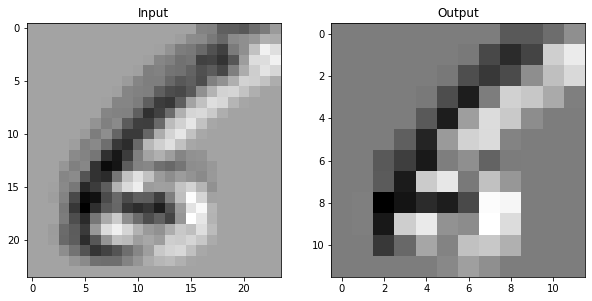

In [158]:
plt.figure(figsize=(10, 15))
plt.subplot(121)
plt.title('Input')
plt.imshow(output[0, 0, :, :], 'gray')
plt.subplot(122)
plt.title('Output')
plt.imshow(pool_arr[0, 0, :, :], 'gray')
plt.show()

In [159]:
pooled_image = pool[0, 0, :, :]
pooled_image.shape

torch.Size([12, 12])

In [160]:
flatten = pool.view(32, -1, 12 * 12)
flatten.shape

torch.Size([32, 20, 144])

In [161]:
lin = nn.Linear(144, 10).to(device)(flatten)

In [162]:
lin.shape

torch.Size([32, 20, 10])

In [163]:
final = lin[0, 0, :].unsqueeze(0)
final

tensor([[-0.0431,  0.0406,  0.9950, -0.1814, -0.0381, -0.2862, -0.4913,  0.3156,
          0.5715,  0.4604]], device='cuda:0', grad_fn=<UnsqueezeBackward0>)

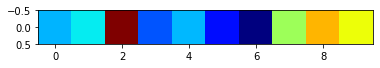

In [164]:
plt.imshow(final.cpu().detach().numpy(), 'jet')
plt.show()

In [165]:
with torch.no_grad():
    softmax = F.softmax(lin, dim=-1)
softmax[0, 0, :]
np.sum(softmax[0, 0, :].cpu().numpy())

0.99999994

In [176]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(1, 20, 5, 1)
        self.conv2 = nn.Conv2d(20, 50, 5, 1)
        self.fc1 = nn.Linear(50*4*4, 500)
        self.fc2 = nn.Linear(500, 10)
    
    def forward(self, x):
        x = F.relu(self.conv1(x))
        x = F.max_pool2d(x, 2, 2)
        x = F.relu(self.conv2(x))
        x = F.max_pool2d(x, 2, 2)

        x = x.view(-1, 50*4*4)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return F.log_softmax(x, dim=1)
       


In [171]:
model = Net()

In [174]:
model.forward(images)

torch.Size([32, 50, 4, 4])


In [177]:
model = Net()

In [178]:
model.to(device)

Net(
  (conv1): Conv2d(1, 20, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(20, 50, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=800, out_features=500, bias=True)
  (fc2): Linear(in_features=500, out_features=10, bias=True)
)

In [179]:
import torch.optim as optim

In [180]:
optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.5)

In [181]:
data, target = next(iter(train_loader))

In [182]:
data.shape, target.shape

(torch.Size([32, 1, 28, 28]), torch.Size([32]))

In [183]:
data, target = data.to(device), target.to(device)

In [184]:
optimizer.zero_grad()

In [186]:
model.train()

Net(
  (conv1): Conv2d(1, 20, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(20, 50, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=800, out_features=500, bias=True)
  (fc2): Linear(in_features=500, out_features=10, bias=True)
)

In [189]:
output = model(data)

In [190]:
output.shape

torch.Size([32, 10])

In [191]:
loss = F.nll_loss(output, target)

In [192]:
loss.backward()

In [193]:
optimizer.step()

In [194]:
epochs = 2
log_interval = 100

In [198]:
for epoch in range(1, epochs + 1):
    model.train()

    for batch_idx, (data,target) in enumerate(train_loader):
        data, target = data.to(device), target.to(device)
        optimizer.zero_grad()
        output = model(data)
        loss = F.nll_loss(output, target)
        loss.backward()
        optimizer.step()

        if batch_idx % log_interval ==0:
            print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
                epoch, batch_idx * len(data), len(train_loader.dataset), 
                100 * batch_idx / len(train_loader), loss.item()
            ))

    model.eval()

    test_loss = 0
    correct = 0

    with torch.no_grad():
        for data, target in test_loader:
            data, target = data.to(device), target.to(device)
            output = model(data)
            test_loss +=F.nll_loss(output, target, reduction='sum').item()
            pred = output.argmax(dim=1, keepdim=True)
            correct += pred.eq(target.view_as(pred)).sum().item()

    test_loss /= len(test_loader.dataset)

    print('\nTest set : Average Loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
        test_loss, correct, len(test_loader.dataset), 100 * correct / len(test_loader.dataset)
    ))

Train Epoch: 1 [0/60000 (0%)]	Loss: 2.293721
Train Epoch: 1 [3200/60000 (5%)]	Loss: 2.269845
Train Epoch: 1 [6400/60000 (11%)]	Loss: 2.241071
Train Epoch: 1 [9600/60000 (16%)]	Loss: 2.192592
Train Epoch: 1 [12800/60000 (21%)]	Loss: 2.174233
Train Epoch: 1 [16000/60000 (27%)]	Loss: 2.002719
Train Epoch: 1 [19200/60000 (32%)]	Loss: 1.960101
Train Epoch: 1 [22400/60000 (37%)]	Loss: 1.905859
Train Epoch: 1 [25600/60000 (43%)]	Loss: 1.537637
Train Epoch: 1 [28800/60000 (48%)]	Loss: 1.346304
Train Epoch: 1 [32000/60000 (53%)]	Loss: 1.013895
Train Epoch: 1 [35200/60000 (59%)]	Loss: 0.800642
Train Epoch: 1 [38400/60000 (64%)]	Loss: 0.764390
Train Epoch: 1 [41600/60000 (69%)]	Loss: 0.768442
Train Epoch: 1 [44800/60000 (75%)]	Loss: 0.448796
Train Epoch: 1 [48000/60000 (80%)]	Loss: 0.495789
Train Epoch: 1 [51200/60000 (85%)]	Loss: 0.362763
Train Epoch: 1 [54400/60000 (91%)]	Loss: 0.362997
Train Epoch: 1 [57600/60000 (96%)]	Loss: 0.423692

Test set : Average Loss: 0.3788, Accuracy: 8926/10000 (89%